Make mask for Nikki: EEZ's

Note this is using python 2 so gdal and ogr work

Converting the shapefile from http://www.marineregions.org/sources.php#unioneezcountry to a mask file for CESM1 x1 POP grid


In [1]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.mlab as mlab
import matplotlib.path as mpath
import numpy as np
import netCDF4 as nc
import gdal
import ogr

In [2]:
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [5,5]
mpl.rcParams['figure.dpi'] = 150
mpl.rcParams['savefig.dpi'] = 200

mpl.rcParams['font.size'] = 16
mpl.rcParams['legend.fontsize'] = 'large'
mpl.rcParams['figure.titlesize'] = 'medium'
mpl.rcParams['lines.linewidth']= 2.0

In [3]:
sfilepre = '/Users/zti318/Documents/Research/Clim_var/EEZs/EEZ_land_union_v2_201410/EEZ_land_v2_201410'
sfile = sfilepre + '.shp'

# plot of correlation for Nikki's paper

Load in Nikki's file an plot EEZ boundaries on it

In [ ]:
import netCDF4 as nc
#myfile = '/Users/chha5666/Documents/Clim_var/EEZs/eez.nc'
myfile = '/Users/zti318/Google Drive/Cheryl and Nikki SHARE/eez.nc'
mydata = nc.Dataset(myfile,'r')

In [15]:
mydata.variables

OrderedDict([(u'correlation', <type 'netCDF4._netCDF4.Variable'>
              float64 correlation(lon, lat)
              unlimited dimensions: 
              current shape = (320, 384)
              filling on, default _FillValue of 9.96920996839e+36 used)])

In [16]:
cor = mydata.variables['correlation'][:]

In [17]:
cor = np.transpose(cor)

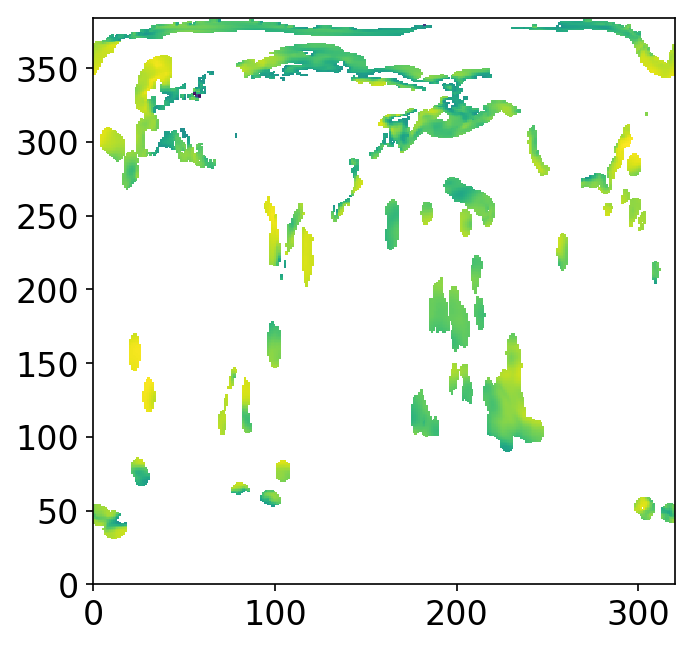

In [18]:
plt.pcolormesh(cor)
# this looks like it is on the pop grid but rotated, need to switch lon and lat

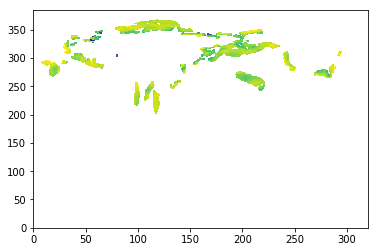

In [25]:
plt.pcolormesh(cor)
# this looks like it is on the pop grid but rotated, need to switch lon and lat

In [9]:
# get POP lat and lon from another file

myfile = '/Users/chha5666/Documents/Clim_var/Fisheries_metric/Data/mean.nday1.nc'
mydata = nc.Dataset(myfile,'r')

lat = mydata.variables['TLAT'][:]
lon = mydata.variables['TLONG'][:]

lon[lon>180] = lon[lon>180]-360

##################
# manipulate data to plot
# make longitudes monotonically increasing
lon = np.where(np.greater_equal(lon,min(lon[:,0])),lon-360,lon)

# stack grids side-by-side (in longitudinal direction), so
# any range of longitudes may be plotted on a world map
lon = np.concatenate((lon,lon+360),1)
lat = np.concatenate((lat,lat),1)
lon = lon - 360
lon.max()

-39.793272294541964

In [10]:
lon = lon + 360

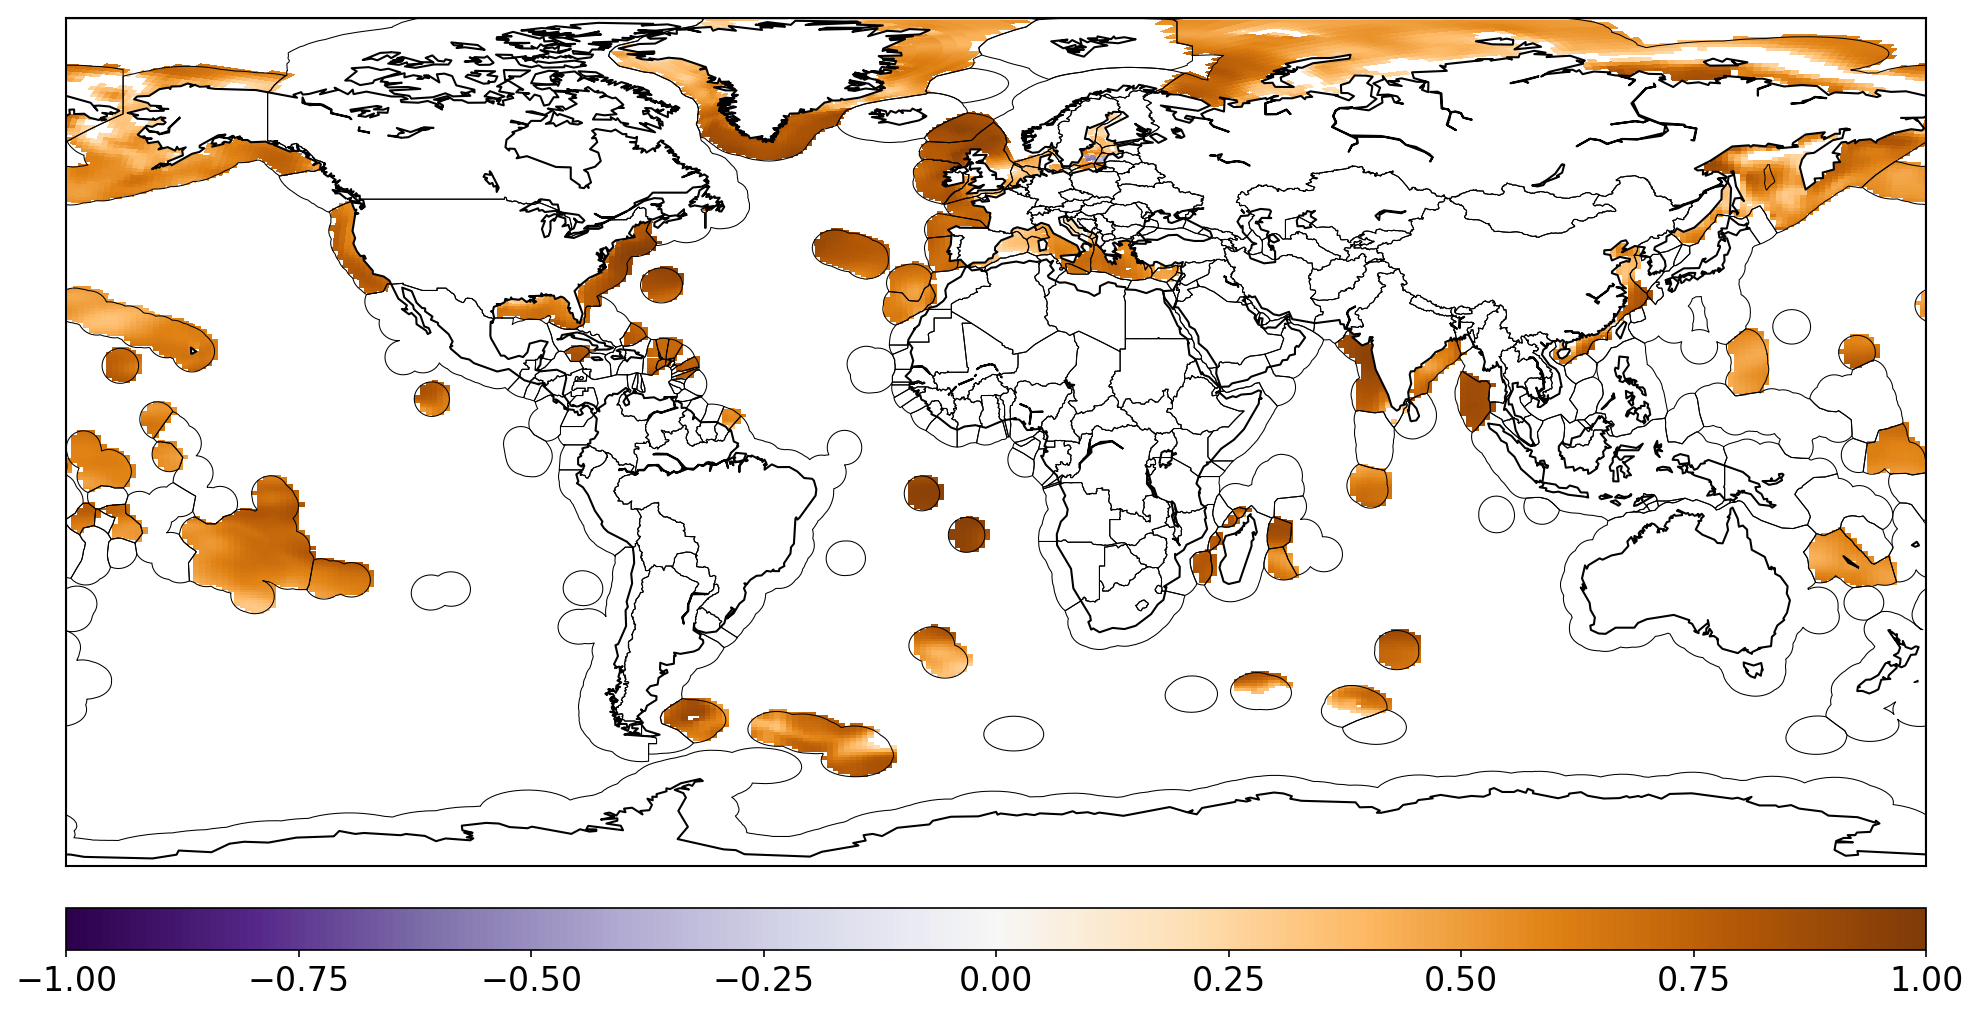

In [19]:
# plot in basemap with LME boundaries
var = cor
temp = np.ma.concatenate((var,var),1)

ax = plt.figure(figsize=(16,20), facecolor = 'w')

# limits of plot
limN, limS, limE, limW = 84.,-80.,180,-180


#m = Basemap(projection='hammer',lon_0=0)
m = Basemap(projection='cyl', llcrnrlon=limW, \
      urcrnrlon=limE, llcrnrlat=limS, urcrnrlat=limN, resolution='c')
m.drawcoastlines()
m.drawmapboundary()
#m.fillcontinents(color='#ddaa66')
m.fillcontinents(color='w')

x, y = m(lon,lat)
im1 = m.pcolormesh(x,y,temp,vmin = -1, vmax = 1, cmap = 'PuOr_r')
cbar = m.colorbar(im1,location='bottom',pad="5%")
#cbar.set_label('corr', fontsize=15)
#m.drawparallels(np.arange(-90.,90.,20), linewidth=0.5, labels=[1,0,0,0])
#m.drawmeridians(np.arange(-180.,180.,20), linewidth=0.5, labels=[0,0,1,0])


m.readshapefile(sfilepre, 'boundary') # the second argment is a name for the shapefile data
#for info, shape in zip(m.LME_info, m.LME):
#        x, y = zip(*shape) 
#        m.plot(x, y, marker=None,color='k', linewidth = '2')       
#plt.show()

plt.savefig('eez_cor.eps')

(261,
 5,
 [-180.00000025799997, -89.99999999999994, 0.0, 0.0],
 [180.0000003350001, 87.02394351600003, 0.0, 0.0],
 <matplotlib.collections.LineCollection at 0x11f2ed810>)

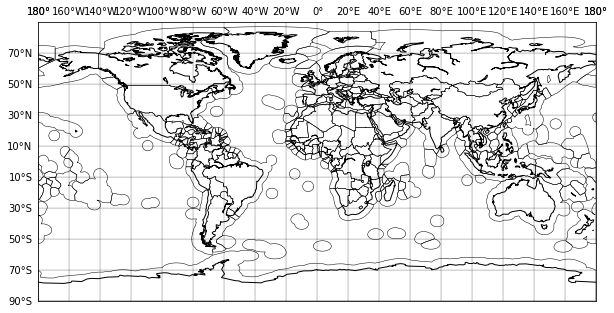

In [3]:

#limN, limS, limE, limW = -10,-50,200,100
ax = plt.figure(figsize=(10,12), facecolor = 'w')

m = Basemap(projection='cyl',lon_0=0)
#m = Basemap(projection='cyl', llcrnrlon=limW, \
#     urcrnrlon=limE, llcrnrlat=limS, urcrnrlat=limN, resolution='c')

m.drawcoastlines()
#m.drawmapboundary()
#m.fillcontinents(color='#ddaa66')
m.drawparallels(np.arange(-90.,90.,20), linewidth=0.5, labels=[1,0,0,0])
m.drawmeridians(np.arange(-180.,180.,20), linewidth=0.5, labels=[0,0,1,0])



m.readshapefile(sfilepre, 'boundary') # the second argment is a name for the shapefile data
#for info, shape in zip(m.LME_info, m.LME):
#        x, y = zip(*shape) 
#        m.plot(x, y, marker=None,color='k', linewidth = '2')       



In [12]:
ds = ogr.Open(sfile)

In [13]:
lyr = ds.GetLayer(0)
numberOfPolygons=lyr.GetFeatureCount()

In [14]:
numberOfPolygons

261

In [15]:
layerDefinition = lyr.GetLayerDefn()
for i in range(layerDefinition.GetFieldCount()):
    print layerDefinition.GetFieldDefn(i).GetName()

OBJECTID
ISO_3digit
Country
Changes
Shape_Leng
Shape_Area


In [10]:
for index in range(0,numberOfPolygons):
    ft = lyr.GetFeature(index)
    print(ft.items())

{'Shape_Area': 24.6008299761, 'OBJECTID': 1, 'Country': 'Conflict zone Japan/Russia', 'Shape_Leng': 20.2437447634, 'ISO_3digit': '-', 'Changes': None}
{'Shape_Area': 6.83636641308, 'OBJECTID': 2, 'Country': 'Conflict zone Japan/South Korea', 'Shape_Leng': 11.2637631002, 'ISO_3digit': '-', 'Changes': None}
{'Shape_Area': 7.86056066433, 'OBJECTID': 3, 'Country': 'Joint regime Japan/Korea', 'Shape_Leng': 12.392902808, 'ISO_3digit': '-', 'Changes': None}
{'Shape_Area': 6.61678655226, 'OBJECTID': 4, 'Country': 'Conflict zone China/Japan/Taiwan', 'Shape_Leng': 9.97810011441, 'ISO_3digit': '-', 'Changes': None}
{'Shape_Area': 36.2940534397, 'OBJECTID': 5, 'Country': 'Spratly Islands', 'Shape_Leng': 24.2274516388, 'ISO_3digit': '-', 'Changes': None}
{'Shape_Area': 1.53950994658, 'OBJECTID': 6, 'Country': 'Joint regime Colombia/Jamaica', 'Shape_Leng': 5.71113262035, 'ISO_3digit': '-', 'Changes': None}
{'Shape_Area': 2.80780749275, 'OBJECTID': 7, 'Country': 'Joint regime Nigeria/Sao Tome and Pri

In [11]:
for index in range(0,numberOfPolygons):
    ft = lyr.GetFeature(index)
    print("Found polygon:", ft.items()['OBJECTID'], '  ',  ft.items()['Country'])

('Found polygon:', 1, '  ', 'Conflict zone Japan/Russia')
('Found polygon:', 2, '  ', 'Conflict zone Japan/South Korea')
('Found polygon:', 3, '  ', 'Joint regime Japan/Korea')
('Found polygon:', 4, '  ', 'Conflict zone China/Japan/Taiwan')
('Found polygon:', 5, '  ', 'Spratly Islands')
('Found polygon:', 6, '  ', 'Joint regime Colombia/Jamaica')
('Found polygon:', 7, '  ', 'Joint regime Nigeria/Sao Tome and Principe')
('Found polygon:', 8, '  ', 'Joint development area Australia/East Timor')
('Found polygon:', 9, '  ', 'Protected zone Australia/Papua New Guinea')
('Found polygon:', 10, '  ', 'Hungary')
('Found polygon:', 11, '  ', 'Tajikistan')
('Found polygon:', 12, '  ', 'Aruba')
('Found polygon:', 13, '  ', 'Afghanistan')
('Found polygon:', 14, '  ', 'Angola')
('Found polygon:', 15, '  ', 'Anguilla')
('Found polygon:', 16, '  ', 'Albania')
('Found polygon:', 17, '  ', 'Andorra')
('Found polygon:', 18, '  ', 'Netherlands Antilles')
('Found polygon:', 19, '  ', 'United Arab Emirates'

In [12]:
for index in range(0,numberOfPolygons):
    print(ft.items()['Country'])
    ft = lyr.GetFeature(index)
    geom = ft.GetGeometryRef()
    print geom.GetGeometryType()
    test = (geom.GetGeometryType() == ogr.wkbPolygon)
    print test
# looks like they are all polygons (3) or type 6, which is a multi-polygon

Kiribati
3
True
Conflict zone Japan/Russia
3
True
Conflict zone Japan/South Korea
3
True
Joint regime Japan/Korea
3
True
Conflict zone China/Japan/Taiwan
3
True
Spratly Islands
3
True
Joint regime Colombia/Jamaica
3
True
Joint regime Nigeria/Sao Tome and Principe
3
True
Joint development area Australia/East Timor
3
True
Protected zone Australia/Papua New Guinea
3
True
Hungary
3
True
Tajikistan
3
True
Aruba
3
True
Afghanistan
6
False
Angola
3
True
Anguilla
3
True
Albania
3
True
Andorra
3
True
Netherlands Antilles
3
True
United Arab Emirates
3
True
Argentina
6
False
Armenia
3
True
American Samoa
3
True
Antarctica
6
False
French Southern & Antarctic Lands
3
True
Antigua & Barbuda
6
False
Australia
3
True
Austria
6
False
Azerbaijan
3
True
Burundi
3
True
Belgium
3
True
Benin
6
False
Bonaire, Sint-Eustasius, Saba
3
True
Burkina Faso
3
True
Bangladesh
3
True
Bulgaria
3
True
Bahrain
3
True
The Bahamas
3
True
Bosnia & Herzegovina
3
True
Belarus
3
True
Belize
3
True
Bermuda
3
True
Bolivia
6
Fals

# Make mask for regular x1 grid

WOA grid

-89.5 to 89.5 in latitude

0.5 359.5 in longitude


Ryan's grid is -179.5 to 179.5

In [5]:
#LON = np.arange(0.5,359.5,1)
LON = np.arange(-179.5,179.5,1)
LAT = np.arange(-89.5,89.5,1)

In [6]:
lon,lat = np.meshgrid(LON,LAT)

I think this has to be in the same lon range as the shapefile to work, i.e. -180 to 180

In [7]:
lon[lon>180] = lon[lon>180]-360

In [8]:
lon.shape

(179, 359)

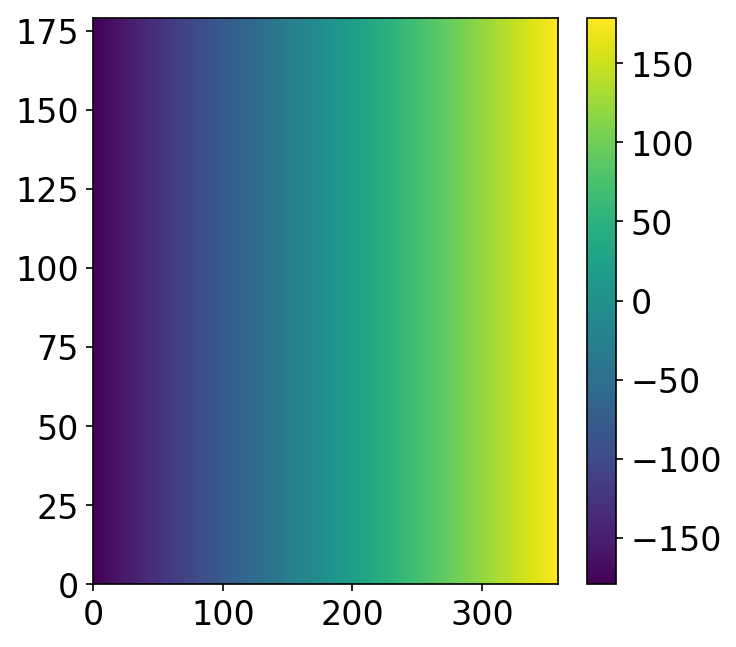

In [9]:
plt.pcolormesh(lon)
plt.colorbar()

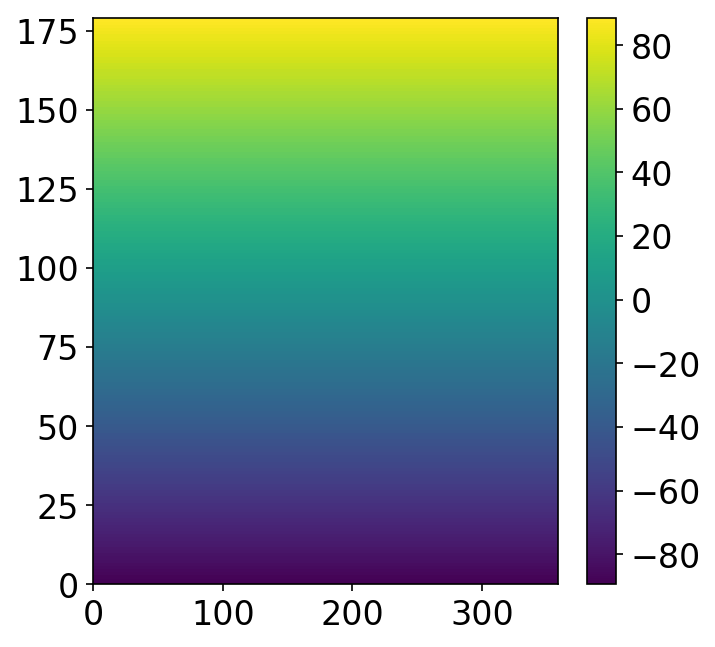

In [10]:
plt.pcolormesh(lat)
plt.colorbar()

In [16]:
EEZ_num = np.zeros(numberOfPolygons)
EEZ_name = []
mask = np.ma.zeros(lon.shape)
#mask = np.ma.masked_where(np.ma.getmask(sst),mask)

lyr = ds.GetLayer(0)
numberOfPolygons=lyr.GetFeatureCount()

for index in xrange(0,numberOfPolygons):
    
    print index
    ft = lyr.GetFeature(index)
    EEZ_num[index] = ft.items()['OBJECTID']
    EEZ_name.append(ft.items()['Country'])

    geom = ft.GetGeometryRef()

    codes = []
    all_x = []
    all_y = []
    inside = []
    suminside = []
    #all_XY= []

    # if regular polygon
    if (geom.GetGeometryType() == ogr.wkbPolygon):
        print "Found EEZ:",  ft.items()['Country']
        for i in xrange(geom.GetGeometryCount()):

            r = geom.GetGeometryRef(i)
            x = [r.GetX(j) for j in xrange(r.GetPointCount())]
            y = [r.GetY(j) for j in xrange(r.GetPointCount())]

            codes += [mpath.Path.MOVETO] + (len(x)-1)*[mpath.Path.LINETO]
            all_x += x
            all_y += y
            #all_XY +=mymap(x,y)
            
            # check if there are grid points inside this part (doesn't matter if on land):
            inside = plt.mlab.inside_poly(zip(lon.flatten(),lat.flatten()),zip(x,y))
            if len(inside) > 0:
                print "Found %s points inside polygon"%(len(inside))
                suminside += inside

    # if multi polygon
    if (geom.GetGeometryType() == ogr.wkbMultiPolygon):
        #codes = []
        print "Found EEZ:",  ft.items()['Country']
        print "Geometric features", geom.GetGeometryCount()
        for i in range(geom.GetGeometryCount()):
            # Read ring geometry and create path
            r = geom.GetGeometryRef(i)
            for part in r:
                x = [part.GetX(j) for j in range(part.GetPointCount())]
                y = [part.GetY(j) for j in range(part.GetPointCount())]
                # skip boundary between individual rings
                codes += [mpath.Path.MOVETO] + (len(x)-1)*[mpath.Path.LINETO]
                all_x += x
                all_y += y
                
                # check if there are grid points inside this part (doesn't matter if on land):
                inside = plt.mlab.inside_poly(zip(lon.flatten(),lat.flatten()),zip(x,y))
                if len(inside) > 0:
                    print "Found %s points inside polygon"%(len(inside))
                    suminside += inside

#         if index==58:
#             all_x = np.asarray(all_x)
#             all_x[all_x>150] = all_x[all_x>150] - 360
        
#     if len(all_x)==0:
#         all_XY=None
#         mypoly=None
#     else:
# #         # convert points to basemap coordinates:
# #         pathX,pathY=mymap(all_x,all_y)
# #         # make path from basemap points (what is this?)
# #         mymappath = mpath.Path(np.column_stack((pathX,pathY)), codes)            

#         # make path from regular points:
#         mypath = mpath.Path(np.column_stack((all_x,all_y)), codes)
#         # convert to polygon (note this is some kind of list with length of the geometry count):
#         mypoly = mpath.Path.to_polygons(mypath)

    mask.ravel()[suminside] = ft.items()['OBJECTID']
    
#mask = np.ma.masked_where(np.ma.getmask(sst),mask)

0
Found EEZ: Conflict zone Japan/Russia
Found 24 points inside polygon

/anaconda3/envs/for_gdal/lib/python2.7/site-packages/ipykernel_launcher.py:40: MatplotlibDeprecationWarning: The inside_poly function was deprecated in version 2.2.



1
Found EEZ: Conflict zone Japan/South Korea
Found 7 points inside polygon
2
Found EEZ: Joint regime Japan/Korea
Found 8 points inside polygon
3
Found EEZ: Conflict zone China/Japan/Taiwan
Found 7 points inside polygon
4
Found EEZ: Spratly Islands
Found 36 points inside polygon
5
Found EEZ: Joint regime Colombia/Jamaica
Found 1 points inside polygon
6
Found EEZ: Joint regime Nigeria/Sao Tome and Principe
Found 3 points inside polygon
7
Found EEZ: Joint development area Australia/East Timor
Found 2 points inside polygon
8
Found EEZ: Protected zone Australia/Papua New Guinea
Found 1 points inside polygon
9
Found EEZ: Hungary
Found 10 points inside polygon
10
Found EEZ: Tajikistan
Found 18 points inside polygon
11
Found EEZ: Aruba
Found 2 points inside polygon
12
Found EEZ: Afghanistan
Found 60 points inside polygon
13
Found EEZ: Angola
Geometric features 2
Found 139 points inside polygon


/anaconda3/envs/for_gdal/lib/python2.7/site-packages/ipykernel_launcher.py:62: MatplotlibDeprecationWarning: The inside_poly function was deprecated in version 2.2.


Found 2 points inside polygon
14
Found EEZ: Anguilla
Found 8 points inside polygon
15
Found EEZ: Albania
Found 3 points inside polygon
16
Found EEZ: Andorra
Found 1 points inside polygon
17
Found EEZ: Netherlands Antilles
18
Found EEZ: United Arab Emirates
Found 10 points inside polygon
19
Found EEZ: Argentina
Found 409 points inside polygon
20
Found EEZ: Armenia
Geometric features 2
Found 3 points inside polygon
21
Found EEZ: American Samoa
Found 34 points inside polygon
22
Found EEZ: Antarctica
Found 8565 points inside polygon
23
Found EEZ: French Southern & Antarctic Lands
Geometric features 6
Found 72 points inside polygon
Found 69 points inside polygon
Found 53 points inside polygon
Found 28 points inside polygon
Found 21 points inside polygon
Found 3 points inside polygon
24
Found EEZ: Antigua & Barbuda
Found 10 points inside polygon
25
Found EEZ: Australia
Geometric features 2
Found 68 points inside polygon
Found 1341 points inside polygon
26
Found EEZ: Austria
Found 12 points i

Found 3 points inside polygon
147
Found EEZ: Mali
Found 111 points inside polygon
148
Found EEZ: Malta
Found 6 points inside polygon
149
Found EEZ: Myanmar
Found 101 points inside polygon
150
Found EEZ: Montenegro
Found 3 points inside polygon
151
Found EEZ: Mongolia
Found 183 points inside polygon
152
Found EEZ: Northern Marinana Islands-Guam
Found 83 points inside polygon
153
Found EEZ: Mozambique
Found 115 points inside polygon
154
Found EEZ: Mauritania
Found 101 points inside polygon
155
Found EEZ: Montserrat
Found 1 points inside polygon
156
Found EEZ: Mauritius
Found 108 points inside polygon
157
Found EEZ: Malawi
Geometric features 3
Found 10 points inside polygon
158
Found EEZ: Malaysia
Geometric features 2
Found 28 points inside polygon
Found 36 points inside polygon
159
Found EEZ: Mayotte
Found 4 points inside polygon
160
Found EEZ: Namibia
Found 126 points inside polygon
161
Found EEZ: New Caledonia
Found 124 points inside polygon
162
Found EEZ: Niger
Found 100 points inside

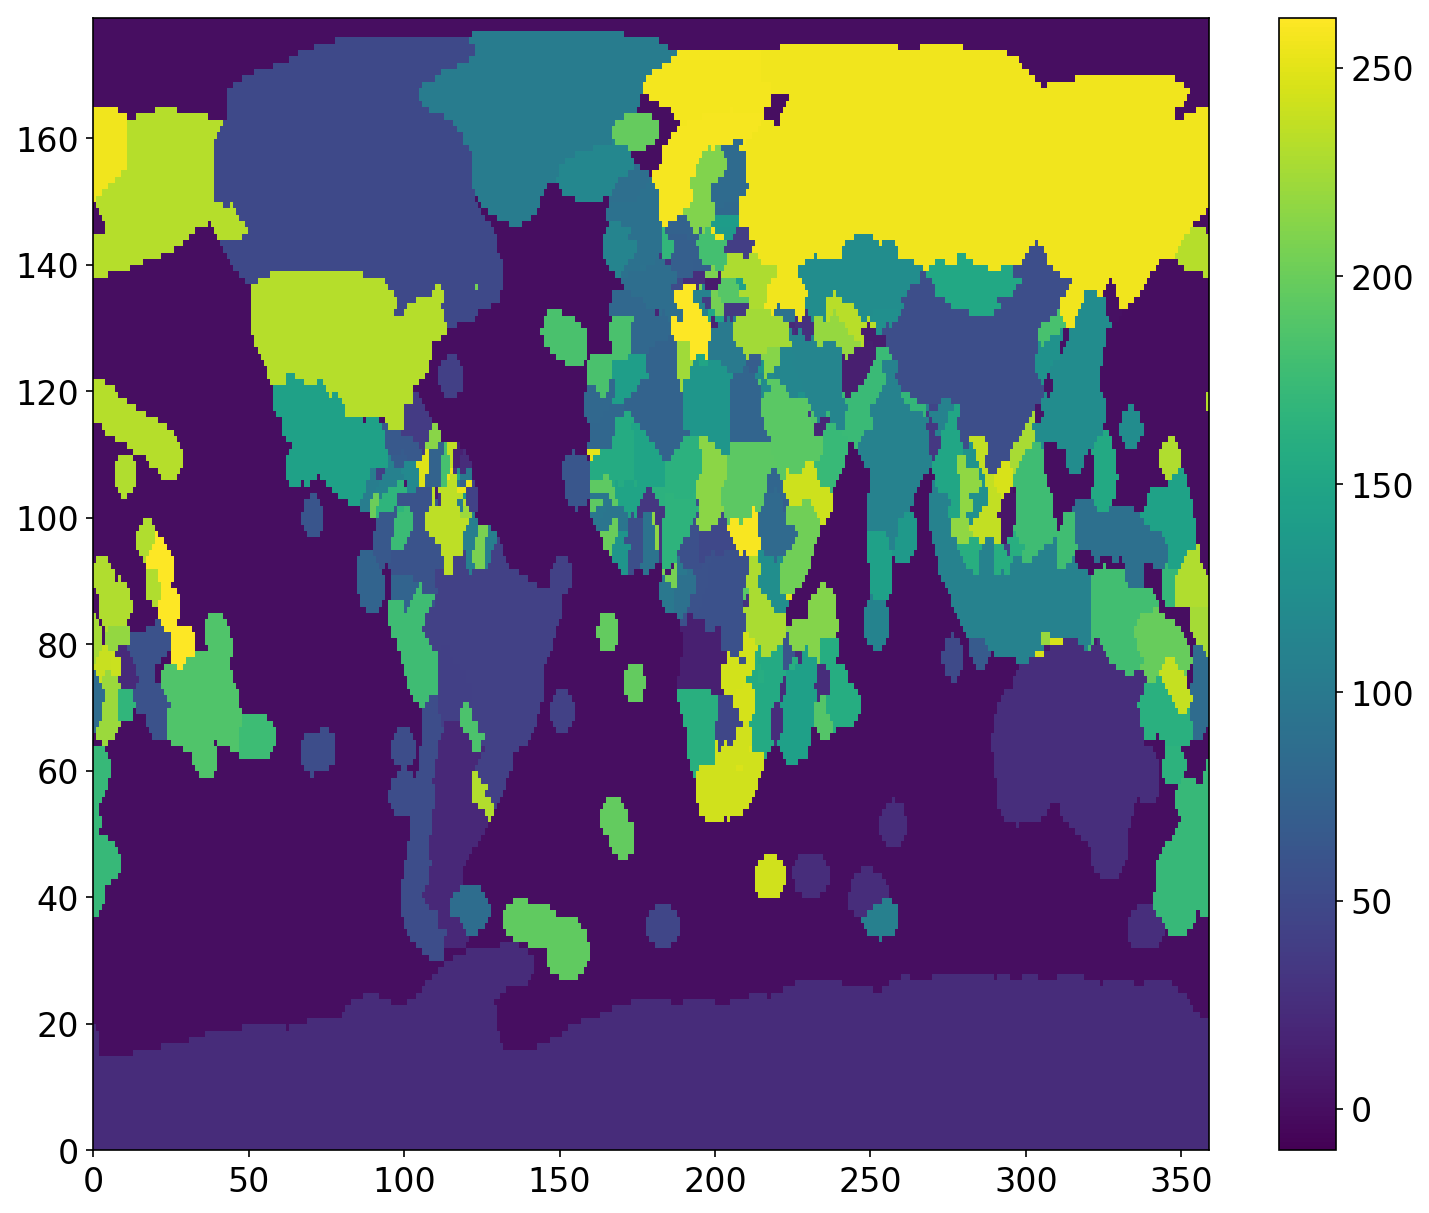

In [17]:
#mask[mask <=0] = -100
#mask = np.ma.masked_where(np.ma.getmask(sst),mask)
fig = plt.figure(figsize=(12,10), facecolor = 'w')
plt.pcolormesh(mask, vmin = -10)
plt.colorbar()

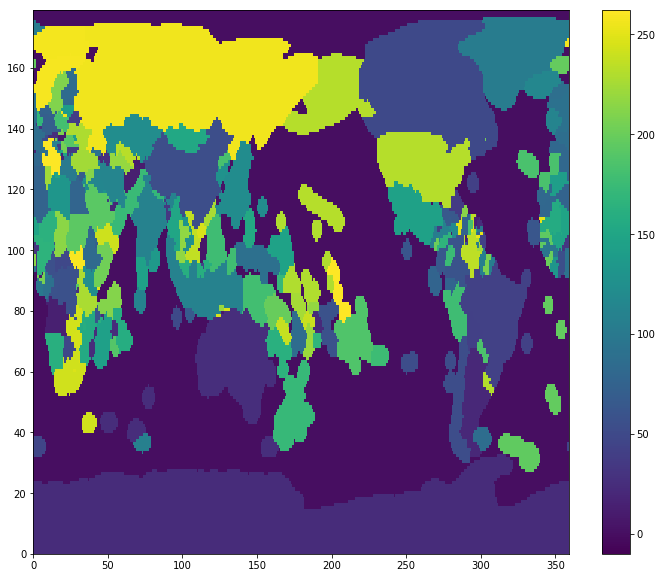

In [36]:
#mask[mask <=0] = -100
#mask = np.ma.masked_where(np.ma.getmask(sst),mask)
fig = plt.figure(figsize=(12,10), facecolor = 'w')
plt.pcolormesh(mask, vmin = -10)
plt.colorbar()

In [38]:
mask.shape

(179, 359)

In [19]:
LON.shape

(359,)

In [22]:
# save the array above to a netcdf file
ncdata = nc.Dataset("/Users/zti318/Documents/Research/Clim_var/EEZs/EEZ_BOATS_mask.nc", 'w', clobber=True)
# create dimensions
ncdata.createDimension('nlat', 179)
ncdata.createDimension('nlon',359)
# create variable
lon = ncdata.createVariable('LON','f4',('nlon'))
lon[:] = LON

lat = ncdata.createVariable('LAT','f4',('nlat'))
lat[:] = LAT

lmask = ncdata.createVariable('EEZ_MASK','f4',('nlat','nlon'))
lmask[:] = mask[:]
ncdata.close()

# Make mask for POP x1 grid

Get POP x1 grid for mask

In [18]:
# load in the netcdf file, extract lat/lon array, and find all points that are in this polyton
import netCDF4 as nc
myfile = '/Users/chha5666/Documents/Clim_var/Fisheries_metric/Data/mean.nday1.nc'
mydata = nc.Dataset(myfile,'r')

lat2 = mydata.variables['TLAT'][:]
lon2 = mydata.variables['TLONG'][:]

lon2[lon2>180] = lon2[lo2n>180]-360

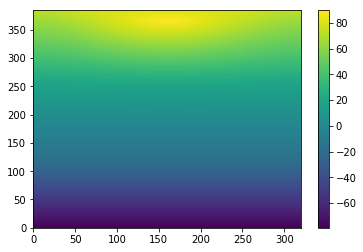

In [29]:
plt.pcolormesh(lat2)
plt.colorbar()

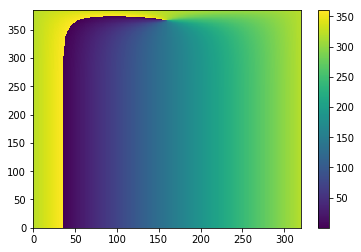

In [30]:
plt.pcolormesh(lon2)
plt.colorbar()

In [35]:
sst = mydata.variables['SST'][0,:,:]
sst.shape

(384, 320)

In [ ]:
lon = lon2
lat = lat2

In [40]:
EEZ_num = np.zeros(numberOfPolygons)
EEZ_name = []
mask = np.ma.zeros(lon.shape)
mask = np.ma.masked_where(np.ma.getmask(sst),mask)

lyr = ds.GetLayer(0)
numberOfPolygons=lyr.GetFeatureCount()

for index in xrange(0,numberOfPolygons):
    
    print index
    ft = lyr.GetFeature(index)
    EEZ_num[index] = ft.items()['OBJECTID']
    EEZ_name.append(ft.items()['Country'])

    geom = ft.GetGeometryRef()

    codes = []
    all_x = []
    all_y = []
    inside = []
    suminside = []
    #all_XY= []

    # if regular polygon
    if (geom.GetGeometryType() == ogr.wkbPolygon):
        print "Found EEZ:",  ft.items()['Country']
        for i in xrange(geom.GetGeometryCount()):

            r = geom.GetGeometryRef(i)
            x = [r.GetX(j) for j in xrange(r.GetPointCount())]
            y = [r.GetY(j) for j in xrange(r.GetPointCount())]

            codes += [mpath.Path.MOVETO] + (len(x)-1)*[mpath.Path.LINETO]
            all_x += x
            all_y += y
            #all_XY +=mymap(x,y)
            
            # check if there are grid points inside this part (doesn't matter if on land):
            inside = plt.mlab.inside_poly(zip(lon.flatten(),lat.flatten()),zip(x,y))
            if len(inside) > 0:
                print "Found %s points inside polygon"%(len(inside))
                suminside += inside

    # if multi polygon
    if (geom.GetGeometryType() == ogr.wkbMultiPolygon):
        #codes = []
        print "Found EEZ:",  ft.items()['Country']
        print "Geometric features", geom.GetGeometryCount()
        for i in range(geom.GetGeometryCount()):
            # Read ring geometry and create path
            r = geom.GetGeometryRef(i)
            for part in r:
                x = [part.GetX(j) for j in range(part.GetPointCount())]
                y = [part.GetY(j) for j in range(part.GetPointCount())]
                # skip boundary between individual rings
                codes += [mpath.Path.MOVETO] + (len(x)-1)*[mpath.Path.LINETO]
                all_x += x
                all_y += y
                
                # check if there are grid points inside this part (doesn't matter if on land):
                inside = plt.mlab.inside_poly(zip(lon.flatten(),lat.flatten()),zip(x,y))
                if len(inside) > 0:
                    print "Found %s points inside polygon"%(len(inside))
                    suminside += inside

#         if index==58:
#             all_x = np.asarray(all_x)
#             all_x[all_x>150] = all_x[all_x>150] - 360
        
#     if len(all_x)==0:
#         all_XY=None
#         mypoly=None
#     else:
# #         # convert points to basemap coordinates:
# #         pathX,pathY=mymap(all_x,all_y)
# #         # make path from basemap points (what is this?)
# #         mymappath = mpath.Path(np.column_stack((pathX,pathY)), codes)            

#         # make path from regular points:
#         mypath = mpath.Path(np.column_stack((all_x,all_y)), codes)
#         # convert to polygon (note this is some kind of list with length of the geometry count):
#         mypoly = mpath.Path.to_polygons(mypath)

    mask.ravel()[suminside] = ft.items()['OBJECTID']
    
mask = np.ma.masked_where(np.ma.getmask(sst),mask)

0
Found EEZ: Conflict zone Japan/Russia


/anaconda3/envs/4gdal2/lib/python2.7/site-packages/ipykernel_launcher.py:40: MatplotlibDeprecationWarning: The inside_poly function was deprecated in version 2.2.


Found 34 points inside polygon
1
Found EEZ: Conflict zone Japan/South Korea
Found 11 points inside polygon
2
Found EEZ: Joint regime Japan/Korea
Found 10 points inside polygon
3
Found EEZ: Conflict zone China/Japan/Taiwan
Found 9 points inside polygon
4
Found EEZ: Spratly Islands
Found 115 points inside polygon
5
Found EEZ: Joint regime Colombia/Jamaica
Found 6 points inside polygon
6
Found EEZ: Joint regime Nigeria/Sao Tome and Principe
Found 9 points inside polygon
7
Found EEZ: Joint development area Australia/East Timor
Found 6 points inside polygon
8
Found EEZ: Protected zone Australia/Papua New Guinea
Found 1 points inside polygon
9
Found EEZ: Hungary
Found 21 points inside polygon
10
Found EEZ: Tajikistan
Found 21 points inside polygon
11
Found EEZ: Aruba
Found 8 points inside polygon
12
Found EEZ: Afghanistan
Found 98 points inside polygon
13
Found EEZ: Angola
Geometric features 2


/anaconda3/envs/4gdal2/lib/python2.7/site-packages/ipykernel_launcher.py:62: MatplotlibDeprecationWarning: The inside_poly function was deprecated in version 2.2.


Found 463 points inside polygon
Found 5 points inside polygon
14
Found EEZ: Anguilla
Found 17 points inside polygon
15
Found EEZ: Albania
Found 9 points inside polygon
16
Found EEZ: Andorra
17
Found EEZ: Netherlands Antilles
Found 1 points inside polygon
18
Found EEZ: United Arab Emirates
Found 18 points inside polygon
19
Found EEZ: Argentina
Found 686 points inside polygon
20
Found EEZ: Armenia
Geometric features 2
Found 7 points inside polygon
21
Found EEZ: American Samoa
Found 107 points inside polygon
22
Found EEZ: Antarctica
Found 8003 points inside polygon
23
Found EEZ: French Southern & Antarctic Lands
Geometric features 6
Found 116 points inside polygon
Found 109 points inside polygon
Found 86 points inside polygon
Found 66 points inside polygon
Found 70 points inside polygon
Found 12 points inside polygon
24
Found EEZ: Antigua & Barbuda
Found 22 points inside polygon
25
Found EEZ: Australia
Geometric features 2
Found 112 points inside polygon
Found 2856 points inside polygon
2

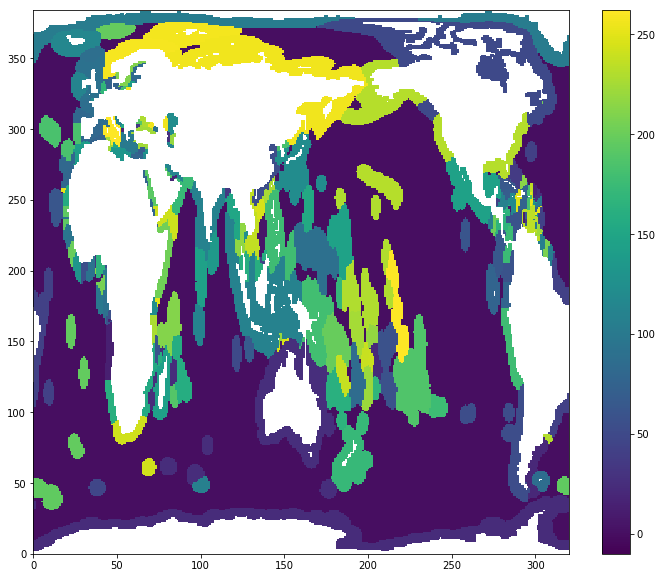

In [41]:
#mask[mask <=0] = -100
mask = np.ma.masked_where(np.ma.getmask(sst),mask)
fig = plt.figure(figsize=(12,10), facecolor = 'w')
plt.pcolormesh(mask, vmin = -10)
plt.colorbar()

In [43]:
lon = mydata.variables['TLONG'][:]
lat = mydata.variables['TLAT'][:]
##################
# manipulate data to plot
# make longitudes monotonically increasing
lon = np.where(np.greater_equal(lon,min(lon[:,0])),lon-360,lon)

# stack grids side-by-side (in longitudinal direction), so
# any range of longitudes may be plotted on a world map
lon = np.concatenate((lon,lon+360),1)
lat = np.concatenate((lat,lat),1)
lon = lon - 360
lon.max()

320.206727705458

In [1]:
# plot in basemap with LME boundaries
var = mask
temp = np.ma.concatenate((var,var),1)


ax = plt.figure(figsize=(16,20), facecolor = 'w')

# limits of plot
limN, limS, limE, limW = 84.,-80.,180,-180


#m = Basemap(projection='hammer',lon_0=0)
m = Basemap(projection='cyl', llcrnrlon=limW, \
      urcrnrlon=limE, llcrnrlat=limS, urcrnrlat=limN, resolution='c')
m.drawcoastlines()
m.drawmapboundary()
#m.fillcontinents(color='#ddaa66')

x, y = m(lon,lat)
im1 = m.pcolormesh(x,y,temp,vmin = 0)
cbar = m.colorbar(im1,location='bottom',pad="5%")
cbar.set_label('EEZ #', fontsize=15)

m.readshapefile(sfilepre, 'boundary') # the second argment is a name for the shapefile data
#for info, shape in zip(m.LME_info, m.LME):
#        x, y = zip(*shape) 
#        m.plot(x, y, marker=None,color='k', linewidth = '2')       
#plt.show()

NameError: name 'mask' is not defined

In [45]:
# save the array above to a netcdf file
ncdata = nc.Dataset("EEZ_x1_mask.nc", 'w', clobber=True)
# create dimensions
ncdata.createDimension('nlat', 384)
ncdata.createDimension('nlon',320)
# create variable
lmask = ncdata.createVariable('EEZ_MASK','f4',('nlat','nlon'))
lmask[:] = mask[:]
ncdata.close()

# Scratch

In [41]:
pwd

u'/Users/chha5666/Documents/Clim_var/EEZs'

In [43]:
ncdata = nc.Dataset('test.nc','w')